In [1]:
print("hello ")

hello 


Simulating Hindmarsh–Rose neuron for chaotic analysis...


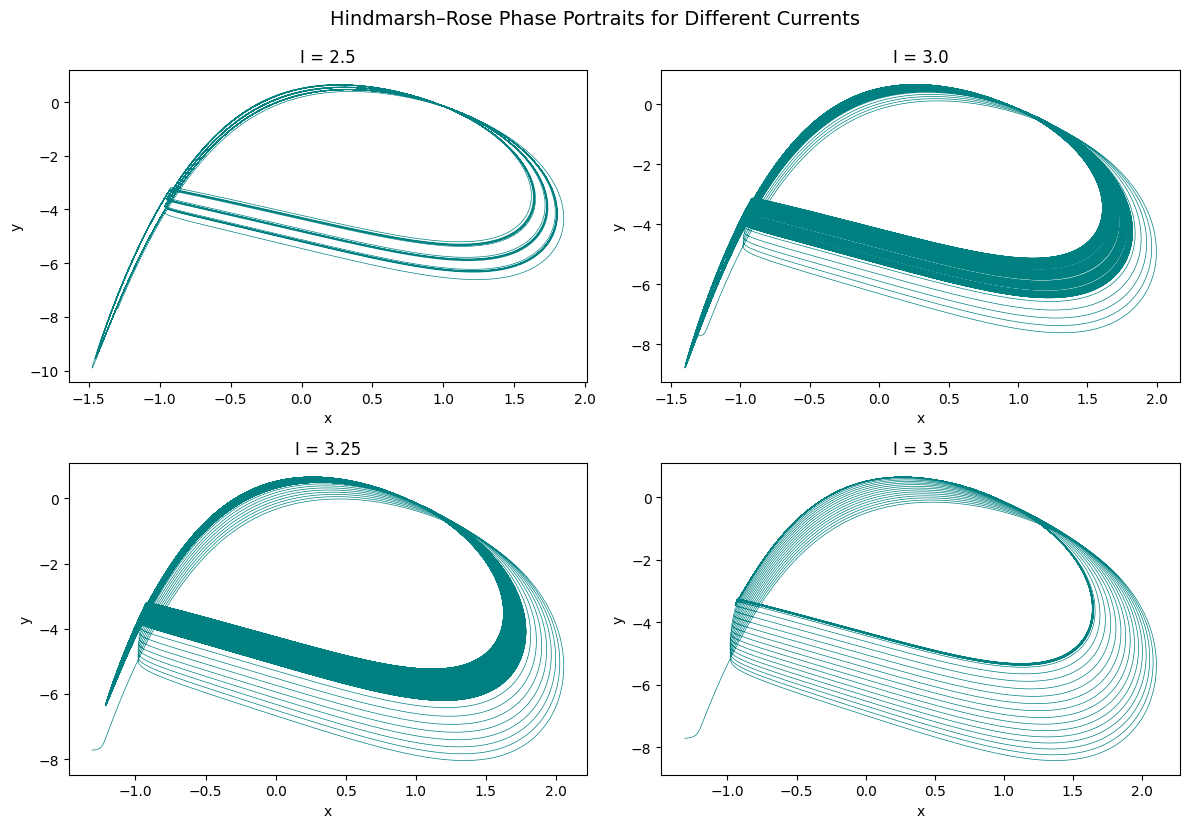

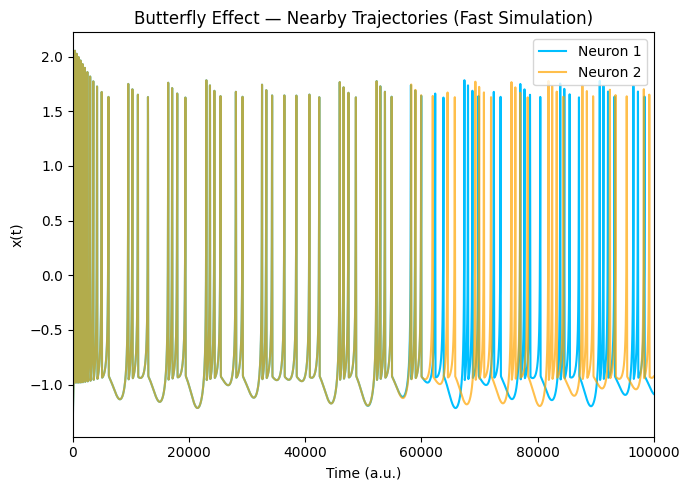


Analyzing I = 3.25


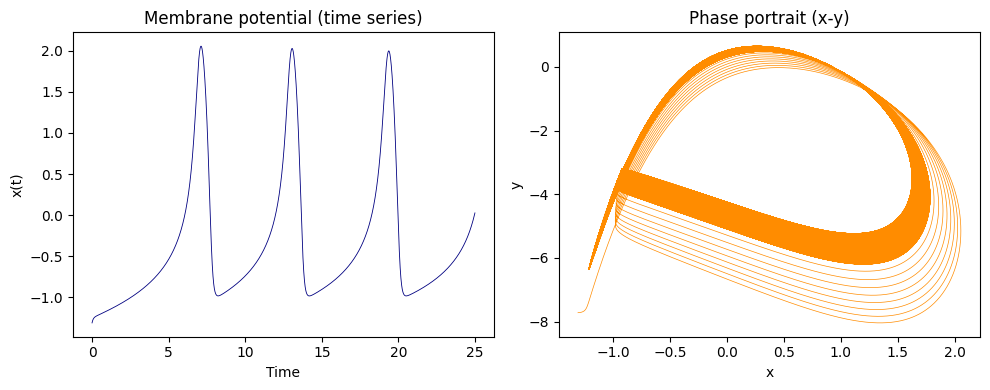

Average λ ≈ 0.01838
→ Positive λ → Chaotic regime ✅

Lyapunov Exponents for Different I Values:
I = 2.500 → λ ≈ -0.00027
I = 2.644 → λ ≈ 0.00035
I = 2.789 → λ ≈ -0.00000
I = 2.933 → λ ≈ 0.00398
I = 3.078 → λ ≈ 0.00863
I = 3.222 → λ ≈ 0.01750
I = 3.367 → λ ≈ 0.01387
I = 3.511 → λ ≈ -0.00135
I = 3.656 → λ ≈ -0.00150
I = 3.800 → λ ≈ -0.00105


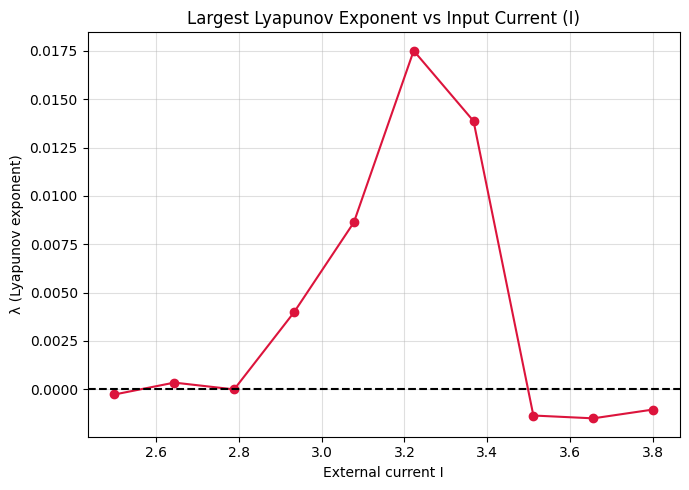

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def rk4_step(f, t, y, dt):
    k1 = f(t, y)
    k2 = f(t + dt/2, [y[i] + dt*k1[i]/2 for i in range(len(y))])
    k3 = f(t + dt/2, [y[i] + dt*k2[i]/2 for i in range(len(y))])
    k4 = f(t + dt, [y[i] + dt*k3[i] for i in range(len(y))])
    return [y[i] + (dt/6)*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) for i in range(len(y))]

def hindmarsh_rose(t, Y, I):
    x, y, z = Y
    a, b, c, d = 1.0, 3.0, 1.0, 5.0
    r, s, x_r = 0.006, 4.0, -1.6
    dx = y - a*x**3 + b*x**2 - z + I
    dy = c - d*x**2 - y
    dz = r * (s * (x - x_r) - z)
    return [dx, dy, dz]

def simulate_hr(I=3.1, T=20000, dt=0.001, Y0=None):
    if Y0 is None:
        Y0 = [-1.31, -7.72, 2.0]
    y = list(Y0)
    xs, ys, zs, ts = [], [], [], []
    t = 0.0
    for _ in range(int(T/dt)):
        y = rk4_step(lambda t, Y: hindmarsh_rose(t, Y, I), t, y, dt)
        xs.append(y[0]); ys.append(y[1]); zs.append(y[2]); ts.append(t)
        t += dt
    return np.array(ts), np.array(xs), np.array(ys), np.array(zs)

def lyapunov_convergence(I=3.25, dt=0.002, T=5000.0,
                         delta0=1e-6, transient_time=1000.0,
                         renorm_interval_time=2.0):
    Y1 = [-1.31, -7.72, 2.0]
    Y2 = [Y1[0] + delta0, Y1[1], Y1[2]]
    t = 0.0
    renorm_interval = int(renorm_interval_time / dt)
    n_steps = int(T / dt)
    lam_values = []
    sum_log_divergence = 0.0
    count = 0

    for step in range(n_steps):
        Y1 = rk4_step(lambda t, Y: hindmarsh_rose(t, Y, I), t, Y1, dt)
        Y2 = rk4_step(lambda t, Y: hindmarsh_rose(t, Y, I), t, Y2, dt)
        t += dt

        delta_vec = [Y2[i] - Y1[i] for i in range(3)]
        delta = math.sqrt(sum(d**2 for d in delta_vec))

        if (step + 1) % renorm_interval == 0 and t > transient_time:
            sum_log_divergence += math.log(delta / delta0)
            count += 1
            lam_inst = sum_log_divergence / (count * renorm_interval * dt)
            lam_values.append(lam_inst)
            scale = delta0 / delta
            Y2 = [Y1[i] + delta_vec[i] * scale for i in range(3)]

    times = np.linspace(transient_time, T, len(lam_values))
    return times, lam_values

def sweep_and_plot():
    I_values = [2.5, 3.0, 3.25, 3.5]
    plt.figure(figsize=(12, 8))
    for i, I in enumerate(I_values):
        ts, xs, ys, zs = simulate_hr(I=I, T=8000, dt=0.001)
        plt.subplot(2, 2, i+1)
        plt.plot(xs, ys, lw=0.5, color='teal')
        plt.title(f"I = {I}")
        plt.xlabel("x"); plt.ylabel("y")
    plt.tight_layout()
    plt.suptitle("Hindmarsh–Rose Phase Portraits for Different Currents", fontsize=14, y=1.03)
    plt.show()

def butterfly_effect(I=3.25, eps=1e-6):
    dt = 0.002
    T = 2000
    steps = int(T / dt)
    skip = 10  

    Y1 = [-1.31, -7.72, 2.0]
    Y2 = [Y1[0] + eps, Y1[1], Y1[2]]

    x1, x2 = [], []
    for step in range(steps):
        Y1 = rk4_step(lambda t, Y: hindmarsh_rose(t, Y, I), step*dt, Y1, dt)
        Y2 = rk4_step(lambda t, Y: hindmarsh_rose(t, Y, I), step*dt, Y2, dt)
        if step % skip == 0:
            x1.append(Y1[0])
            x2.append(Y2[0])

    plt.figure(figsize=(7,5))
    plt.plot(x1, label='Neuron 1', color='deepskyblue')
    plt.plot(x2, label='Neuron 2', color='orange', alpha=0.7)
    plt.xlim(0, len(x1))
    plt.xlabel("Time (a.u.)"); plt.ylabel("x(t)")
    plt.title("Butterfly Effect — Nearby Trajectories (Fast Simulation)")
    plt.legend(); plt.tight_layout(); plt.show()

def single_I_diagnostics(I=3.25):
    print(f"\nAnalyzing I = {I}")
    ts, xs, ys, zs = simulate_hr(I=I, T=8000, dt=0.001)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(ts[:25000], xs[:25000], color='navy', lw=0.6)
    plt.xlabel("Time"); plt.ylabel("x(t)")
    plt.title("Membrane potential (time series)")
    plt.subplot(1,2,2)
    plt.plot(xs, ys, color='darkorange', lw=0.5)
    plt.xlabel("x"); plt.ylabel("y")
    plt.title("Phase portrait (x-y)")
    plt.tight_layout(); plt.show()

    # Removed the Lyapunov convergence plot section
    times, lam = lyapunov_convergence(I=I, dt=0.002, T=5000.0,
                                      delta0=1e-6, transient_time=1000.0,
                                      renorm_interval_time=2.0)
    
    # Keep only the numerical output
    if len(lam) > 0:
        print(f"Average λ ≈ {np.mean(lam[-10:]):.5f}")
        if np.mean(lam[-10:]) > 0:
            print("→ Positive λ → Chaotic regime ✅")
        else:
            print("→ Non-positive λ → Periodic regime ❌")

def lyapunov_vs_I_plot():
    I_values = np.linspace(2.5, 3.8, 10)
    lyap_values = []
    print("\nLyapunov Exponents for Different I Values:")
    for I in I_values:
        times, lam = lyapunov_convergence(I=I, dt=0.002, T=5000.0,
                                          delta0=1e-6, transient_time=1000.0,
                                          renorm_interval_time=2.0)
        avg_lambda = np.mean(lam[-10:]) if len(lam) > 0 else 0.0
        lyap_values.append(avg_lambda)
        print(f"I = {I:.3f} → λ ≈ {avg_lambda:.5f}")

    plt.figure(figsize=(7,5))
    plt.plot(I_values, lyap_values, marker='o', color='crimson')
    plt.axhline(0, color='black', ls='--')
    plt.title("Largest Lyapunov Exponent vs Input Current (I)")
    plt.xlabel("External current I")
    plt.ylabel("λ (Lyapunov exponent)")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Simulating Hindmarsh–Rose neuron for chaotic analysis...")
    sweep_and_plot()             # 1️⃣ Phase portraits
    butterfly_effect(I=3.25)     # 2️⃣ Fast butterfly effect
    single_I_diagnostics(I=3.25) # 3️⃣ Lyapunov convergence (without plot)
    lyapunov_vs_I_plot()         # 4️⃣ λ vs I